<a href="https://colab.research.google.com/github/reutdayan/Machine-Learning/blob/main/Kmeans_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><b>Machine Learning</b></center></h1>
<h3><center>Exercise 6</center></h3>
<h4><center>K-Means and PCA<center></h4>

*Your* Name:  
<font color='red'>
Reut Dayan, 206433245
</font>


**Instructions:**
- Create a copy of this notebook and implement your code in it.
- Make sure you don't leave empty cells or empty answers.
- You should not change the code we provided you.
- When you finish the assignment, download this ***notebook*** and ***predictions.txt*** and submit it to the [**"submit"**](https://submit.cs.biu.ac.il/cgi-bin/welcome.cgi) system. 
To Download the notebook go to **"File"** -> **"Download .ipynb"**.  
- Submit deadline: 18/1/2023

## Part 1 - K-Means (50%)

In this part you will have to implement the K-Means algorithm that was learned in class.<br>
**The implementation will be based on the numpy package only.**

### **1. Useful packages**

In [60]:
import matplotlib.pyplot as plt
import numpy as np

### **2. Data**

Generate a 2D dataset

In [61]:
## Generate 2D data 
X = np.concatenate([
    np.random.normal([0, 0], size=(500, 2)),
    np.random.normal([5, 5], size=(500, 2)),
    np.random.normal([5, 0], size=(500, 2)),
    np.random.normal([0, 5], size=(500, 2)),
])

# Shuffle the data
np.random.shuffle(X)

print(X.shape)

(2000, 2)


Plot the data to explore how many clusters it contains

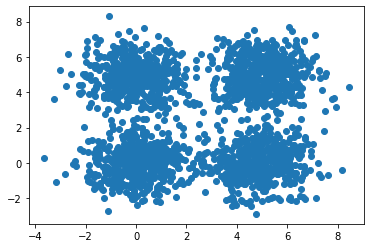

In [62]:
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')

### **3. K-Means**

Implement the algorithm

In [63]:
import random
import math

class KMeans():
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        
        ######## Helper fields #########
        self.X_fit_ = None      # Here you should store the dataset X. 
                                # This can be useful for the next tasks.
        
        self.labels_ = None     # Here you should store the final labels. 
                                # That is, the clusters indices for all the samples

        self.centroids = None   # Here you should store the final centroids.

        self.labels_history = []    # Here you should store the labels of each iteration.
                                    # This can also be useful later.
        
        self.centroids_history = [] # Here you should store the centroids of each iteration.
                                    # This can also be useful later.

        self.costs = []             # Here you should store the costs of the iterations.
                                    # That is, you should calculate the cost in every iteration
                                    # and store it in this list.


    def fit(self, X):
      # start with n_clusters random centroids
      self.centroids = []
      for i in range(self.n_clusters):
        x = random.random()
        y = random.random()
        self.centroids.append((x, y))
      self.centroids_history.append(self.centroids)
      self.X_fit_ = X
      # iterate until convergence
      for i in range(self.max_iter):
        # assign every sample to its closest centroids
        self.labels = self._get_labels(X)
        # add the assignment to history labels
        self.labels_history.append(self.labels)
        # update the centroids to be the mean of all sampels assigned to a cluster
        self.centroids =list(self._get_centroids(X, self.labels).values())
        self.centroids_history.append(self.centroids)
        self.costs.append(self._calculate_cost(X))

      

    def predict(self, X):
      self.find_closest_centroids(X)

    def _get_distances(self, X):
      distances = []
      for centroid in self.centroids:
        # distance = sqrt((x2 - x1)**2 + (y2 - y1)**2)
        distance = (centroid[0] - X[0]) ** 2 + (centroid[1] - X[1]) ** 2
        distance = math.sqrt(distance)
        distances.append(distance)
      return distances

    def find_closest_centroid(self, x):
      closest_centroid = None
      closest_distance = float('inf')
      for centroid in self.centroids:
        # distance = sqrt((x2 - x1)**2 + (y2 - y1)**2)
        distance = (centroid[0] - x[0]) ** 2 + (centroid[1] - x[1]) ** 2
        distance = math.sqrt(distance)
        if distance < closest_distance:
          closest_centroid = centroid
          closest_distance = distance
      return closest_centroid

    def _get_labels(self, X):
      labels=[]
      for x in X:
        # check closest centroids
        closest_centroid = self.find_closest_centroid(x)
        labels.append(closest_centroid)
      return labels

    def _get_centroids(self, X, labels):
      labels_sum_x = {}
      labels_sum_y = {}
      labels_count={}
      for i in range(len(X)):
        label = labels[i]
        if label in list(labels_sum_x.keys()):
          labels_sum_x[label] += X[i,0]
          labels_sum_y[label] += X[i,1]
          labels_count[label] +=1
        else:
          labels_sum_x[label] = X[i,0]
          labels_sum_y[label] = X[i,1]
          labels_count[label] =1
      labels_average = {label: (labels_sum_x[label] / labels_count[label],
                                labels_sum_y[label] / labels_count[label]) for label in labels_sum_x}
      return labels_average


    
    def _calculate_cost(self, X):
      cost =0
      for i, x in enumerate(X):
        dist = math.sqrt((x[0] - self.labels[i][0]) ** 2 + (x[1] - self.labels[i][1]) ** 2)
        cost += dist
      return cost



Run the algorithm on the 2D dataset

In [64]:
n_clusters = 4 
kmeans = KMeans(n_clusters=n_clusters, max_iter=6)
kmeans.fit(X)

Plot a graph of the costs as a function of the iterations

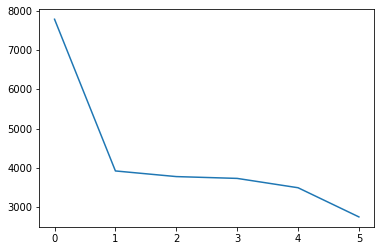

In [65]:
costs = kmeans.costs
plt.plot(costs)

Now run the algorithm several more times with n_clusters = 2, 3, 4, 6, 8, 10, 20 and write **below** the **final** cost you got in each experiment.<br>

2 clusters: 5408.65 <br>
3 clusters: 3915.80 <br>
4 clusters: 2497.94 <br>
6 clusters: 2231.99 <br>
8 clusters: 1999.01 <br>
10 clusters: 1830.91 <br>
20 clusters: 1440.28 <br>

In [66]:
def plot_clusters(labels, X, centroids, colors, n_cluster = 4, is_title_iterations=False, iteration = 1):
  # plot points
  for x, label in zip(X, labels):
    plt.scatter(x[0], x[1], c=colors[label])

  # plot centroids
  for centroid in centroids:
    plt.scatter(centroid[0], centroid[1], c ='black' , s=200)
    if is_title_iterations:
      plt.title("iteration: " + str(iteration))
    else:
      plt.title("clustered data "+ str(n_cluster) + " clusters")
    plt.xlabel("x")
    plt.ylabel("y")
  
  plt.show()


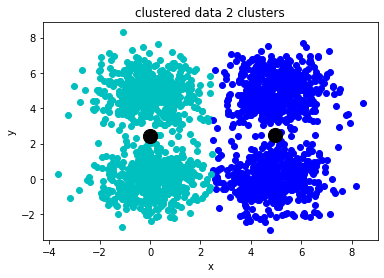

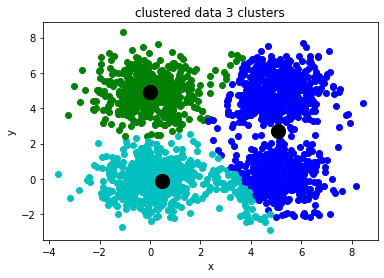

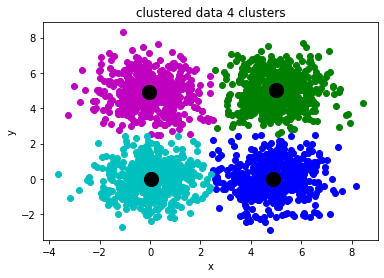

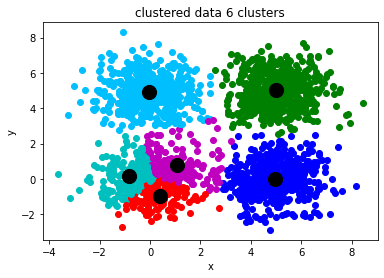

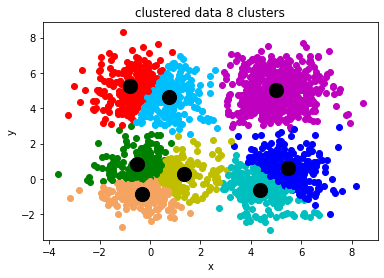

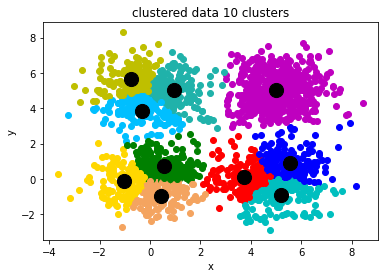

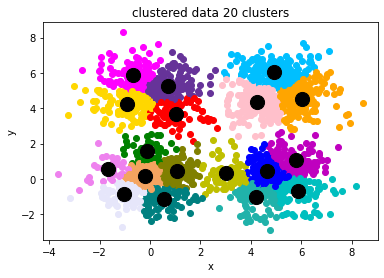

{2: 5364.366960860695, 3: 3903.1146262057778, 4: 2469.7644429038896, 6: 2266.4904252692177, 8: 2013.194282979755, 10: 1879.091490066645, 20: 1405.577115946437}


In [67]:
clusters = [2,3,4,6,8,10,20]
colors = ['b','c','g','m','deepskyblue', 'r','y','sandybrown', 'gold', 'lightseagreen', 'orange', 'olive', 'fuchsia', 'pink', 'teal', 'lavender', 'rebeccapurple' , 'violet', 'orangered', 'yellow']
costs ={}
for cluster in clusters:
  kmeans = KMeans(n_clusters=cluster)
  kmeans.fit(X)
  costs[cluster] = kmeans.costs[-1]
  centroid_to_color = dict(zip(kmeans.centroids, colors[:cluster]))
  plot_clusters(kmeans.labels, kmeans.X_fit_, kmeans.centroids, centroid_to_color, cluster)

print(costs)

Now write a code that plots the clusters and the locations of the centroids at each iteration

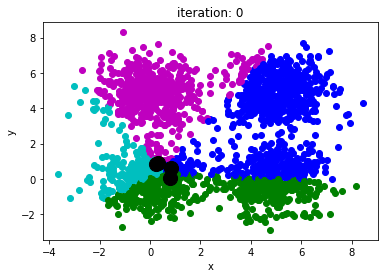

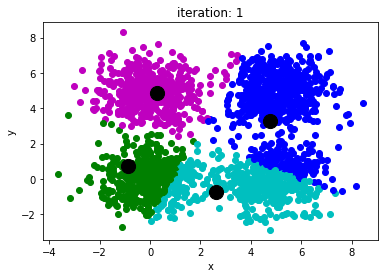

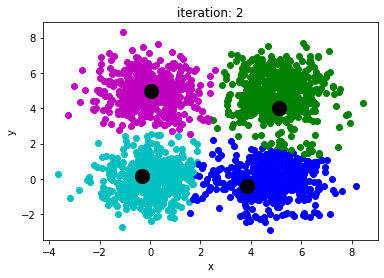

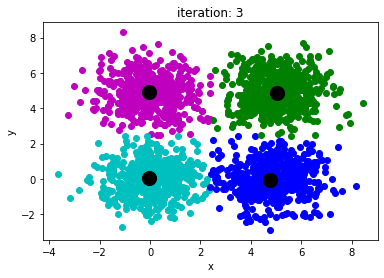

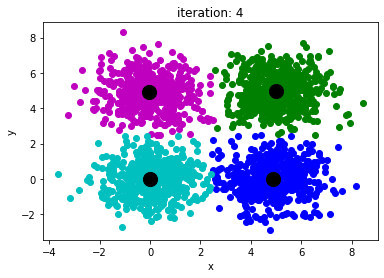

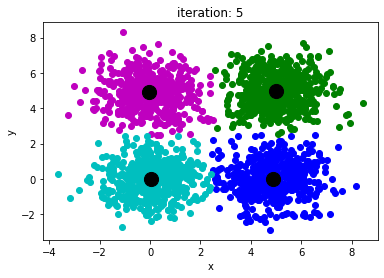

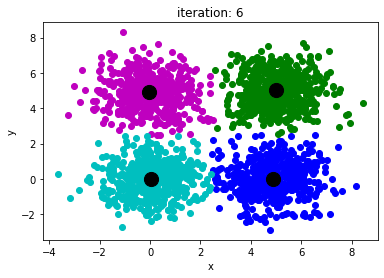

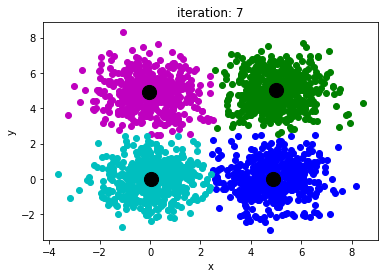

In [70]:
colors = ['b','c','g','m']
max_iter =8
kmeans = KMeans(n_clusters=4, max_iter=max_iter)
kmeans.fit(X)
45 
for iter in range(max_iter):
  labels = kmeans.labels_history[iter]
  centroids = kmeans.centroids_history[iter]
  centroid_to_color = dict(zip(centroids, colors))
  plot_clusters(labels, kmeans.X_fit_, centroids, centroid_to_color, is_title_iterations=True ,iteration= iter)


## Part 2 - PCA (50%)

In this part you will implement the PCA algorithm on the MNIST dataset.<br>
**As in the first part, your implementation will be based on the numpy package only.**

### **1. Useful packages**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 

from sklearn.datasets import fetch_openml

### **2. Data**

Load the MNIST dataset from sklearn datasets.

In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
print(X.shape)

(70000, 784)


### **3. PCA**

Implement the PCA algorithm here.<br> Don't forget to center the data, i.e. make the mean of the columns of the dataset to 0.

In [ ]:
import numpy as np

class PCA:
    def __init__(self):
        self.V = None

    def fit(self, X):
      # normalaize
      average_data = sum(X)/len(X)
      X = np.array([X[i]- average_data for i in range(len(X))])
      # eigenvectors of the covariance matrix 
      cov = np.cov(X, rowvar=0)
      igenvalues, eigenvectors = np.linalg.eig(cov)
      self.V = eigenvectors
      return self.V

    def transform(self, X, n_dimentions):
      X_reduced = X @ self.V[:,0:n_dimentions]
      return X_reduced.T



Run the algorithm on MNIST dataset.

In [ ]:
pca = PCA()
V = pca.fit(X)

# transform the data to the top 2 principal components
X_reduced = pca.transform(X, 2).T

In [ ]:
X_reduced.shape

(70000, 2)

Plot the data in the top 2 principal component space.

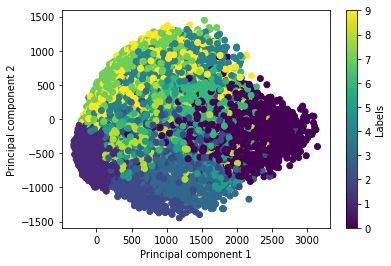

In [ ]:
y = [int(label) for label in y]
fig, ax = plt.subplots()
scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')

cbar = fig.colorbar(scatter)
cbar.set_label('Labels')

ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')

plt.show()

As we showed in class, $V\in \mathbb{R}^{d\times r}$  is the matrix whose colmns are the top  $r$ eigenvectors of $X^TX$. That is, the eigenvectors that correspond to the  $r$ largest eigenvalues. <br>
In the cell below, Write a code that plots the two matrices $V^TV$ and $VV^T$.<br>
Explain the differences between the two matrices

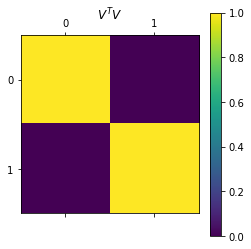

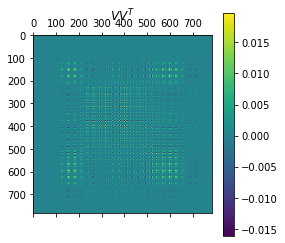

In [ ]:
V = pca.V[:,:2]
plt.matshow(np.real(V.T @ V))
plt.title("$V^TV$")
plt.colorbar()
plt.show()

plt.matshow(np.real(V @ V.T))
plt.title("$VV^T$")
plt.colorbar()

plt.show()

Your Explanation: 
<br>
The differences between the two matrices is that: 
<br/>
$V^TV ∈ \mathbb{R}^{r\times r} $ and it is the identity matrix since it is the eigenvector of the covariance matrix of the data, and the eigenvectors are orthonormal.
<br/>
$VV^T ∈ \mathbb{R}^{d\times d} $ ant it is a matrix that map from d to r and from r to d- the reconstruction matrix.

Now write a function that projects a sample to a n-dimentional space  and **recontsturct** it to the original space.

In [ ]:
def pca_reconstruction(x, n_dimentions):
  W = pca.V[:,0:n_dimentions]
  x_reconstructed = W @ (W.T @ x.T)
  return x_reconstructed

Now write code that samples a random image from the dataset, and uses the function above to project it into n-dimensional space and reconstruct it to the original space. <br><br>
Is the reconstructed image the original image?
<br><br>

Perform the reconstruction above from spaces of dimensions: 3, 10, 100.<br>


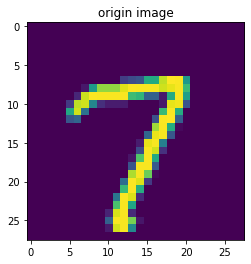

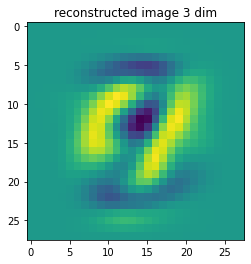

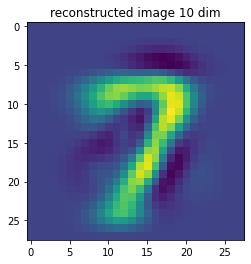

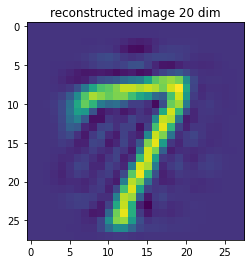

In [ ]:
def plot_vector_as_image(vector, title):
  # Reshape the 784-dimensional vector into a 28x28 array
  image = np.reshape(vector, (28, 28))

  # Display the image
  plt.imshow(image)
  plt.title (title)
  plt.show()


i = np.random.randint(0,len(X)-1)
x = X[i,:]
plot_vector_as_image(x, 'origin image')

x_reconstructed= pca_reconstruction(x,3)
plot_vector_as_image(x_reconstructed, 'reconstructed image 3 dim')

x_reconstructed= pca_reconstruction(x,10)
plot_vector_as_image(x_reconstructed, 'reconstructed image 10 dim')

x_reconstructed= pca_reconstruction(x,100)
plot_vector_as_image(x_reconstructed, 'reconstructed image 20 dim')